# 📊 Sales Performance Analytics for a Multi-Channel Retailer
## 🔍 Objective:
Analyze historical sales, promotions, and inventory data to uncover patterns and recommend strategies for boosting revenue.
## 💡 Key Tasks:
-	Channel-wise sales comparison (online vs offline)
-	Impact of discounts on profitability
-	Seasonality and customer behavior analysis
-	Product bundling and category growth recommendations
## 📈 Tools:
Power BI or Tableau, Python (pandas, seaborn), SQL


### Importing Libraries

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Data Loading and Preprocessing

In [3]:
df = pd.read_csv('sales_records.csv', parse_dates=['Order Date','Ship Date'])
df.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,2010-05-28,669165933,2010-06-27,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,2012-08-22,963881480,2012-09-15,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,2014-05-02,341417157,2014-05-08,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,2014-06-20,514321792,2014-07-05,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2013-02-01,115456712,2013-02-06,5062,651.21,524.96,3296425.02,2657347.52,639077.50


In [4]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Region          100 non-null    object        
 1   Country         100 non-null    object        
 2   Item Type       100 non-null    object        
 3   Sales Channel   100 non-null    object        
 4   Order Priority  100 non-null    object        
 5   Order Date      100 non-null    datetime64[ns]
 6   Order ID        100 non-null    int64         
 7   Ship Date       100 non-null    datetime64[ns]
 8   Units Sold      100 non-null    int64         
 9   Unit Price      100 non-null    float64       
 10  Unit Cost       100 non-null    float64       
 11  Total Revenue   100 non-null    float64       
 12  Total Cost      100 non-null    float64       
 13  Total Profit    100 non-null    float64       
dtypes: datetime64[ns](2), float64(5), int64(2), object(5)
memor

Region            0
Country           0
Item Type         0
Sales Channel     0
Order Priority    0
Order Date        0
Order ID          0
Ship Date         0
Units Sold        0
Unit Price        0
Unit Cost         0
Total Revenue     0
Total Cost        0
Total Profit      0
dtype: int64

In [5]:
df['Month'] = df['Order Date'].dt.month
df['Weekday'] = df['Order Date'].dt.day_name()

df.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Month,Weekday
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,2010-05-28,669165933,2010-06-27,9925,255.28,159.42,2533654.00,1582243.50,951410.50,5,Friday
1,Central America and the Caribbean,Grenada,Cereal,Online,C,2012-08-22,963881480,2012-09-15,2804,205.70,117.11,576782.80,328376.44,248406.36,8,Wednesday
2,Europe,Russia,Office Supplies,Offline,L,2014-05-02,341417157,2014-05-08,1779,651.21,524.96,1158502.59,933903.84,224598.75,5,Friday
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,2014-06-20,514321792,2014-07-05,8102,9.33,6.92,75591.66,56065.84,19525.82,6,Friday
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2013-02-01,115456712,2013-02-06,5062,651.21,524.96,3296425.02,2657347.52,639077.50,2,Friday


### Channel-wise Sales Comparison

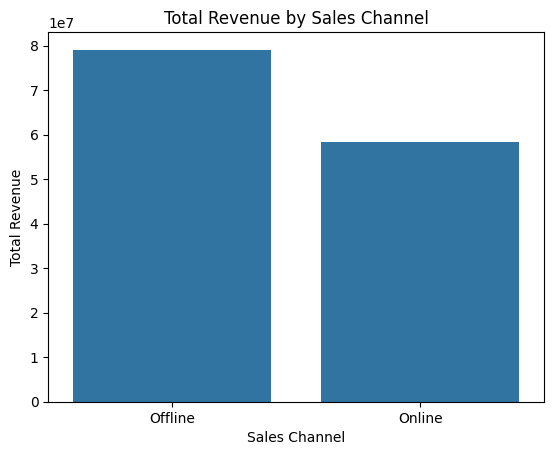

In [7]:
channel_revenue = df.groupby('Sales Channel')['Total Revenue'].sum().reset_index()

sns.barplot(x='Sales Channel', y='Total Revenue',data=channel_revenue)
plt.title('Total Revenue by Sales Channel')
plt.ylabel('Total Revenue')
plt.show()

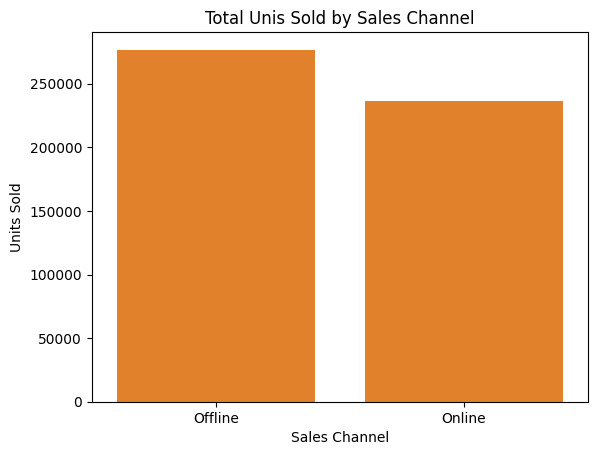

In [9]:
channel_units = df.groupby('Sales Channel')['Units Sold'].sum().reset_index()
sns.barplot(x='Sales Channel', y='Units Sold', data=channel_units)

sns.barplot(x='Sales Channel', y='Units Sold', data=channel_units)
plt.title('Total Unis Sold by Sales Channel')
plt.ylabel('Units Sold')
plt.show()

### Impact of Discounts on Profitability

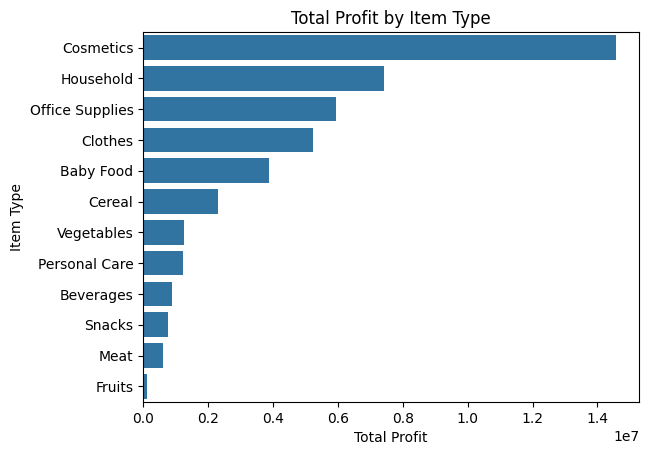

In [11]:
item_profit = df.groupby('Item Type')['Total Profit'].sum().reset_index()

sns.barplot(x='Total Profit', y='Item Type', data=item_profit.sort_values('Total Profit', ascending=False))
plt.title('Total Profit by Item Type')
plt.xlabel('Total Profit')
plt.ylabel('Item Type')
plt.show()

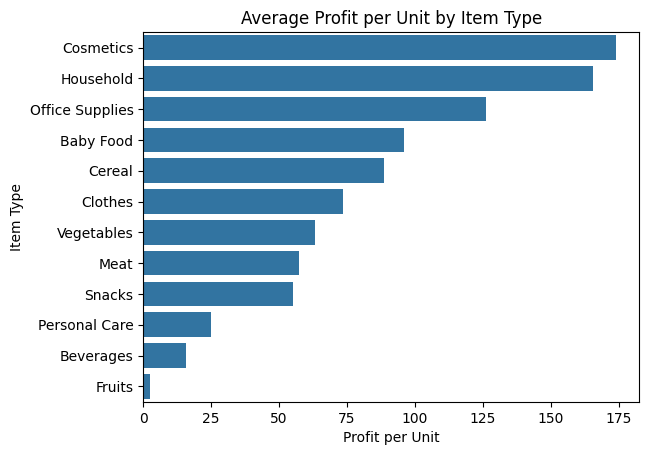

In [12]:
df['Profit per Unit'] = df['Total Profit'] / df['Units Sold']

profit_per_unit_item = df.groupby('Item Type')['Profit per Unit'].mean().reset_index()

sns.barplot(x='Profit per Unit', y='Item Type', data=profit_per_unit_item.sort_values('Profit per Unit', ascending=False))
plt.title('Average Profit per Unit by Item Type')
plt.xlabel('Profit per Unit')
plt.ylabel('Item Type')
plt.show()

### Seasonality and customer behavior analysis

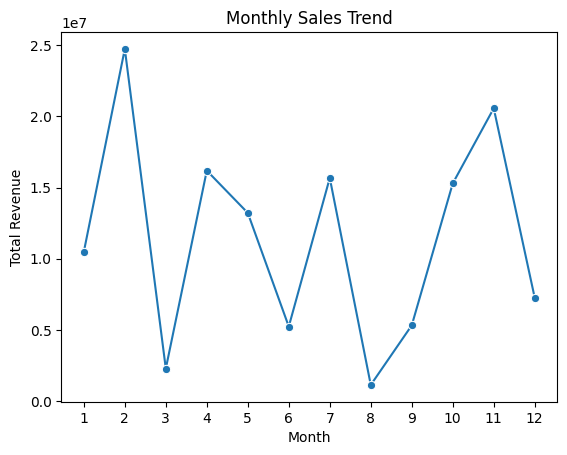

In [13]:
monthly_sales = df.groupby('Month')['Total Revenue'].sum().reset_index()

sns.lineplot(x='Month', y='Total Revenue', data=monthly_sales, marker='o')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.xticks(range(1,13))
plt.show()

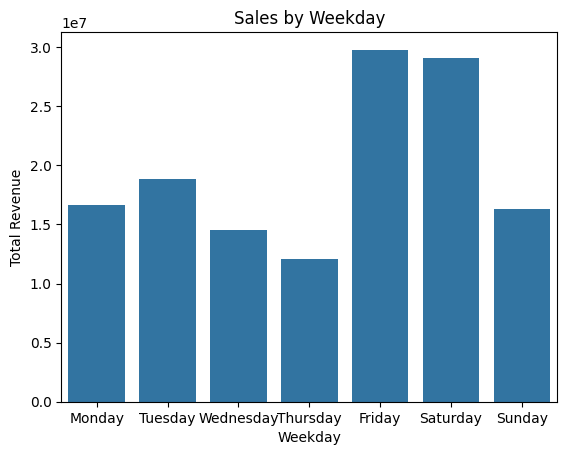

In [14]:
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_sales = df.groupby('Weekday')['Total Revenue'].sum().reindex(weekday_order).reset_index()

sns.barplot(x='Weekday', y='Total Revenue', data=weekday_sales)
plt.title('Sales by Weekday')
plt.xlabel('Weekday')
plt.ylabel('Total Revenue')
plt.show()

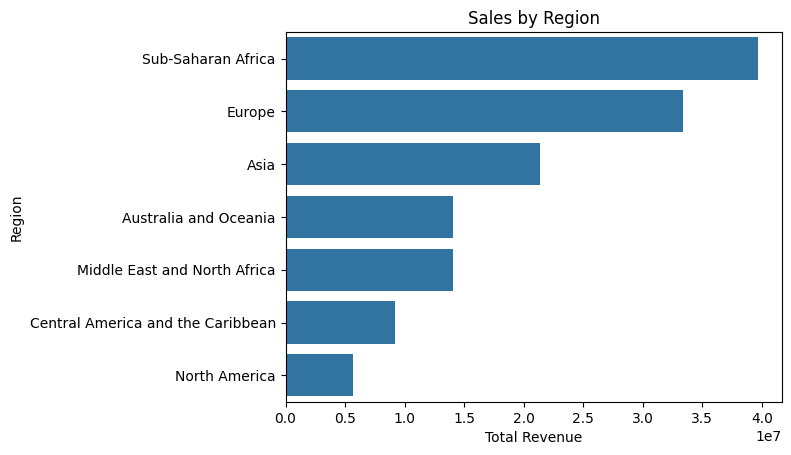

In [15]:
region_sales = df.groupby('Region')['Total Revenue'].sum().reset_index()


sns.barplot(x='Total Revenue', y='Region', data=region_sales.sort_values('Total Revenue', ascending=False))
plt.title('Sales by Region')
plt.xlabel('Total Revenue')
plt.ylabel('Region')
plt.show()


### Product bundling and category growth recommendations

#### Top 5 Items by Units Sold

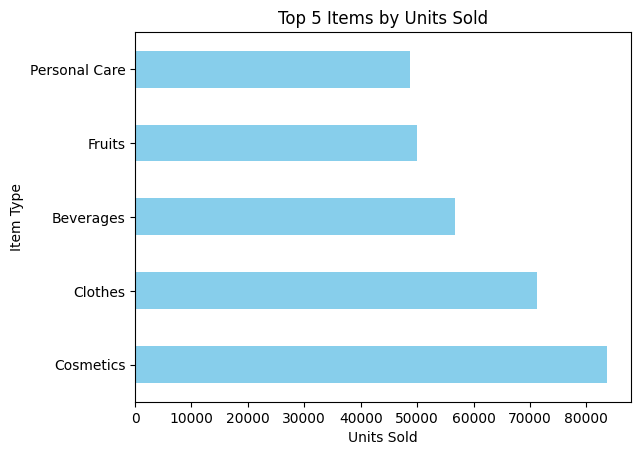

In [16]:
top_items_units = df.groupby('Item Type')['Units Sold'].sum().sort_values(ascending=False).head(5)

top_items_units.plot(kind='barh', color='skyblue')
plt.title('Top 5 Items by Units Sold')
plt.xlabel('Units Sold')
plt.ylabel('Item Type')
plt.show()

#### Top 5 Items Types by Profit

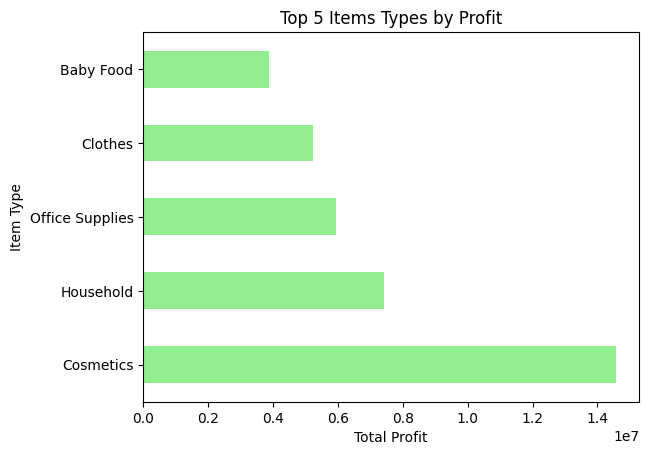

In [17]:
top_items_profit = df.groupby('Item Type')['Total Profit'].sum().sort_values(ascending=False).head(5)

top_items_profit.plot(kind='barh', color='lightgreen')
plt.title('Top 5 Items Types by Profit')
plt.xlabel('Total Profit')
plt.ylabel('Item Type')
plt.show()
